## Part a

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
figsize=(12, 5)

from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)
import sympy as sp
sp.init_printing()

In [2]:
x = '''0 0 0 -4 0 0 0 0 0 0 2 2 2 2 
2 0 -3 -3 -3 0 0 0 0 0 1 -4 0 4 
3 -1 2 -3 -1 0 2 -4 -2 1 0 0 0 3 
-3 3 -3 3 -3 3 -3 3 -3 0 0 0 0 0 0'''
x_a = map(lambda i: float(i.strip('\n')), x.split(' '))
x_a = list(x_a)
indices = [i for i in range(len(x_a))]

In [3]:
def plot_linegraph(x, y, xlabel, ylabel, title='', xmarker='o', xlinestyle='-', ymarker='x', ylinestyle='-.'):
#     plt.scatter(x, y, marker=marker)
#     plt.plot(x, y, linestyle=linestyle)
#     plt.hlines(0, -1, len(x), linestyle='dotted', color='black')
#     plt.xlim(-1, len(x))
#     plt.gcf().set_size_inches(12., 5., forward=True)
    arange = np.arange(len(x))
    plt.figure(num=1, figsize=figsize)
    plt.scatter(arange, x, marker=xmarker, label=xlabel)
    plt.plot(x, linestyle=xlinestyle)
    plt.scatter(arange, y, marker=ymarker, label=ylabel)
    plt.plot(y, linestyle=ylinestyle)
    plt.title(title)
    plt.xlim(-1, len(x))
    plt.hlines(0, -1, len(x), linestyle='dotted', color='black')
    plt.legend()
    

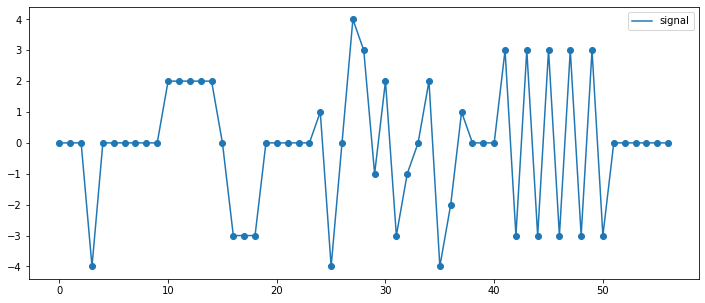

In [4]:
plt.figure(num=1, figsize=figsize)
plt.scatter(np.arange(len(x_a)), x_a)
plt.plot(x_a, label='signal')
plt.legend()

### Part a.i Exponential Averaging system <br />

$y_n = \Sigma_{m=0}^n \alpha * (1 - \alpha)^{n-m} * x_m$ <br />
$y_n= \alpha * x_n + (1-\alpha)*y_{n-1}$ <br />
$ \implies y_n - (1-\alpha)*y_{n-1} = \alpha * x_n$ <br />

Thus, b = [$\alpha$] and a = [1, $\alpha - 1$]


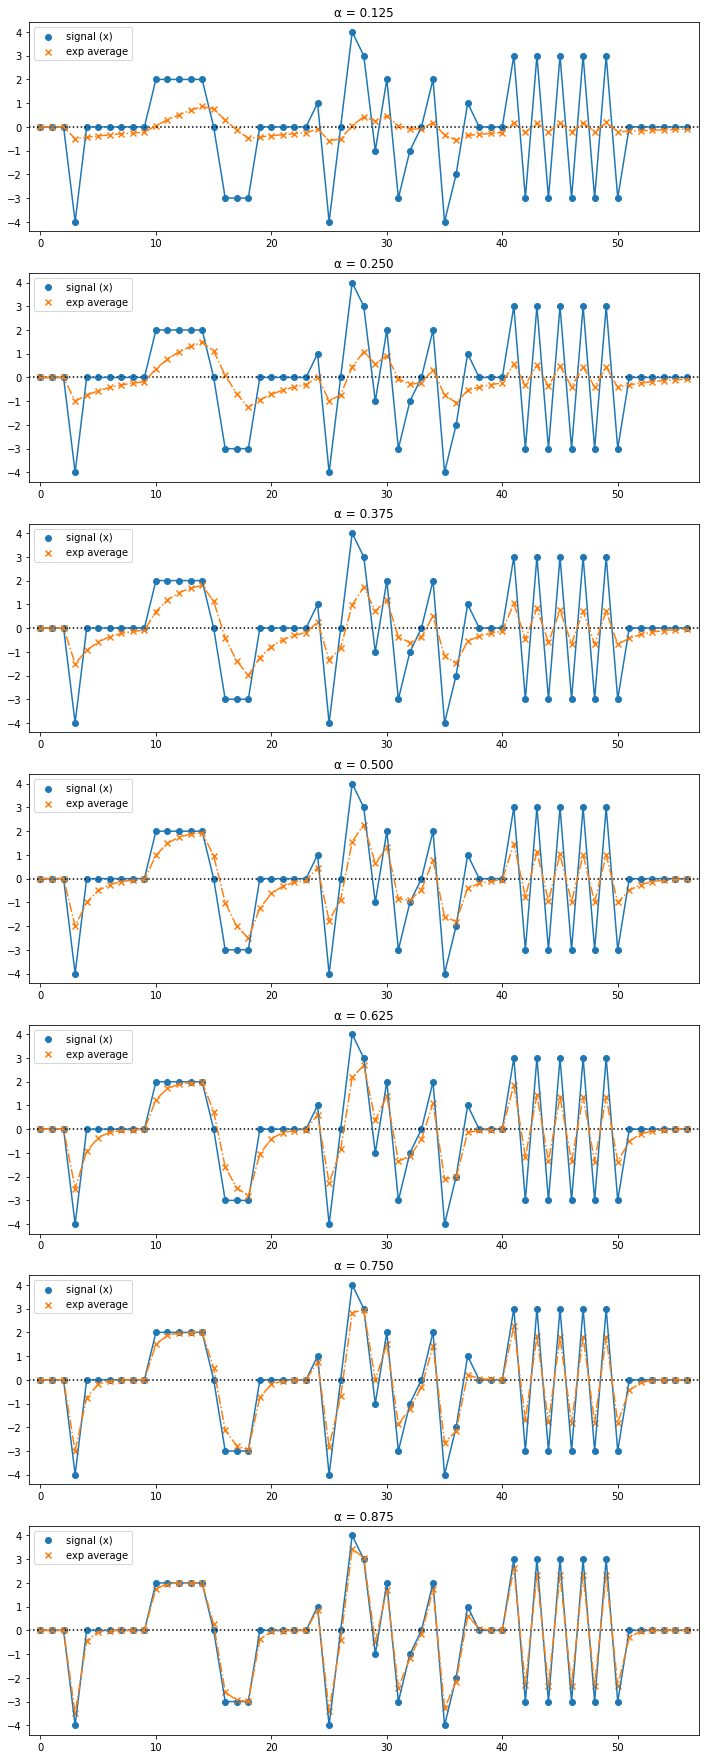

In [5]:
n = 8
fig, axs = plt.subplots(n-1)
fig.set_size_inches(12., (n-1)*4.5, forward=True)
v = 1 / n
plt.xlim(-1, len(x_a))
plt.title("Part a(i) Exponential Averaging System")
indices = np.arange(len(x_a))
for i in range(n-1):
    alpha = (i+1)*v
    x_exponen = signal.lfilter([alpha], [1., alpha-1], x_a)
    axs[i].scatter(indices, x_a, label='signal (x)')
    axs[i].plot(indices, x_a)
    axs[i].scatter(indices, x_exponen, marker='x', label='exp average')
    axs[i].plot(indices, x_exponen, linestyle='-.')
    axs[i].set_title('\u03B1 = %.3f'%alpha)
    axs[i].hlines(0, -1, len(x_a), color='black', linestyle='dotted')
    axs[i].set_xlim(-1, len(x_a))
    axs[i].legend()
    

### Part a.ii Accumulator System <br />

$y_n = \Sigma_{m=0}^n x_m$ <br />
$y_n = x_n + y_{n-1}$ <br />
$y_n - y_{n-1} = x_n$ <br />

Thus b = [1] and a = [1, -1]

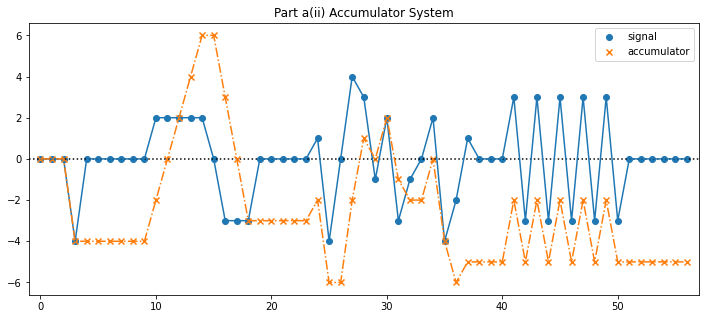

In [6]:
x_accumulator = signal.lfilter([1], [1, -1], x_a)
plot_linegraph(x_a, x_accumulator, 
              xlabel='signal', 
              ylabel='accumulator',
              title='Part a(ii) Accumulator System')

### Part a.iii Backward Difference System <br />

$y_n = x_n - x_{n-1}$ <br />

Thus, a = [1, -1] and b = [1]

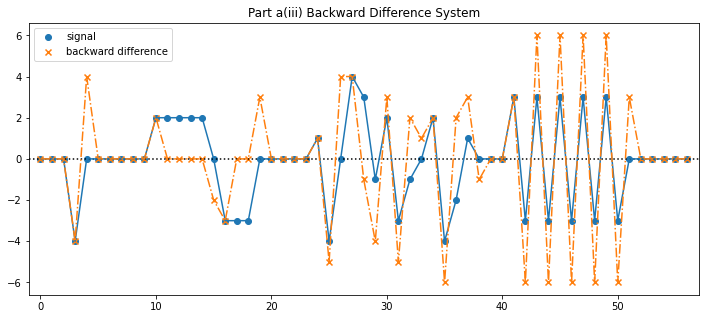

In [7]:
x_backward_difference = signal.lfilter([1, -1], [1], x_a)
# plot_linegraph(indices, x_backward_difference, marker='x', linestyle='-.')
# plot_linegraph(indices, x)
plot_linegraph(x_a, x_backward_difference, 
               xlabel='signal', 
               ylabel='backward difference', 
               title='Part a(iii) Backward Difference System')

## Part (b)

In [8]:
low_pass_45 = signal.firwin(50, 45/150)
low_pass_50 = signal.firwin(50, 50/150)
Fs_b = 300
fs_b = 100
def reconstruction_filter_b(t, X, fs):
    # t is the timestamp we are looking for
    # Fs is original frequency of sampling 300
    # X is the new sampled signal
    # fs is the new sampling frequency
    sincs = np.sinc(t*fs - np.arange(len(X)))
    output = np.dot(X, sincs)
    return output

In [9]:
def plot_linegraphs_unmarked(x, y, xlabel, ylabel, xlinestyle='-', ylinestyle='-.', title=''):
    plt.figure(num=1, figsize=figsize)
    plt.plot(x, label=xlabel, linestyle=xlinestyle)
    plt.plot(y, label=ylabel, linestyle=ylinestyle)
    plt.title(title)
    plt.legend()

vector $a$ is trivially [1] in this case for both low_pass_45 and low_pass_50

In [10]:
r_b = np.random.normal(0, 1, size=Fs_b)
r_b[:15] = 0
r_b[-15:] = 0
x_b = signal.filtfilt(low_pass_45, [1.], r_b)
y_b = [x_b[i] if i%3==0 else 0 for i in range(Fs_b)]

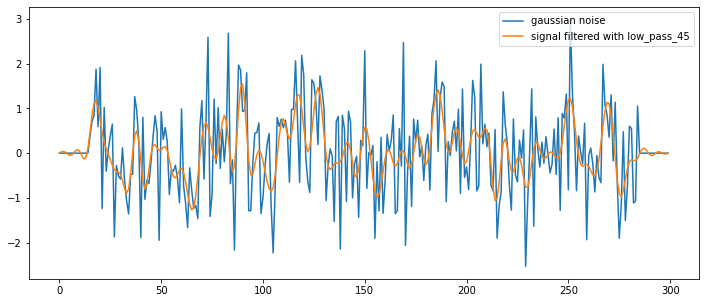

In [11]:
plot_linegraphs_unmarked(r_b, x_b, xlabel='gaussian noise', ylabel='signal filtered with low_pass_45', ylinestyle='-')

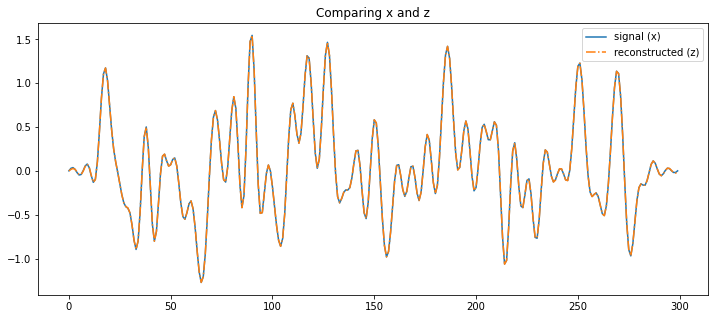

In [12]:
X_b = np.array([y_b[i] for i in range(Fs_b) if i%3==0])
z_b = np.zeros(Fs_b)
for i in range(Fs_b):        
    z_b[i] = reconstruction_filter_b(i/Fs_b, X_b, fs_b)
    
plot_linegraphs_unmarked(x_b, z_b, xlabel='signal (x)', ylabel='reconstructed (z)', title='Comparing x and z')

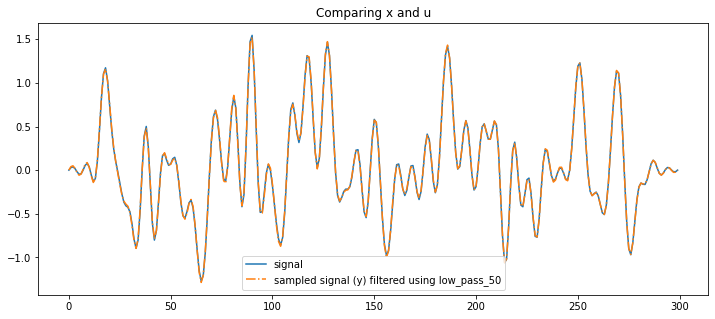

In [13]:
u_b = 3*signal.filtfilt(low_pass_50, [1.], y_b)
plot_linegraphs_unmarked(x_b, u_b, xlabel='signal', ylabel='sampled signal (y) filtered using low_pass_50',
                        title='Comparing x and u')

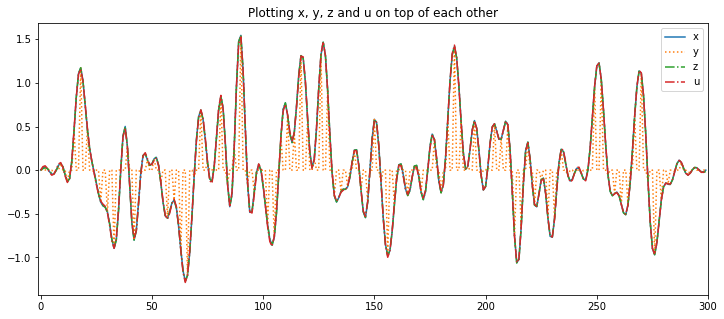

In [14]:
plt.figure(num=1, figsize=figsize)
plt.plot(x_b, label='x', linestyle='-')
plt.plot(y_b, label='y', linestyle=':')
plt.plot(z_b, label='z', linestyle='-.')
plt.plot(u_b, label='u', linestyle='-.')
plt.xlim(-1, len(x_b))
plt.title('Plotting x, y, z and u on top of each other')
plt.legend()

## Part (c.i)

In [26]:
Fs_c = 3000
fs_c = 30

band_pass_31_44_b, band_pass_31_44_a = signal.cheby2(3, 30, [31/1500, 44/1500], "bandpass", output='ba')
band_pass_30_45_b, band_pass_30_45_a = signal.cheby2(3, 20, [30/1500, 45/1500], "bandpass", output='ba')


def reconstruction_filter_c(t, X, fs):
    n = len(X)
    T = t*fs - np.arange(n)
    sincs = np.sinc(T/2)
    coses = np.cos((5/2)*np.pi*T)
    
    ht = np.multiply(sincs, coses)
    
    return np.dot(X, ht)

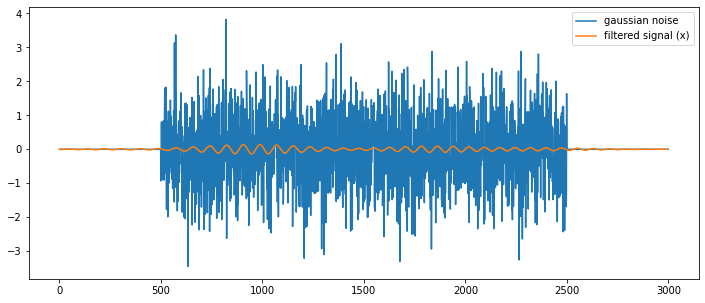

In [27]:
r_c = np.random.normal(size=3000)
r_c[:500] = 0
r_c[-500:] = 0

x_c1 = signal.filtfilt(band_pass_31_44_b, band_pass_31_44_a, r_c)
y_c1 = [x_c1[i] if i%100 == 0 else 0 for i in range(len(x_c1))]
plot_linegraphs_unmarked(r_c, x_c1, xlabel='gaussian noise', ylabel='filtered signal (x)', ylinestyle='-')
# plt.figure(num=1, figsize=(12, 5))
# plt.plot(r_c, label='noise')
# plt.plot(x_c1, label='filtered signal (x)')

# plt.legend()

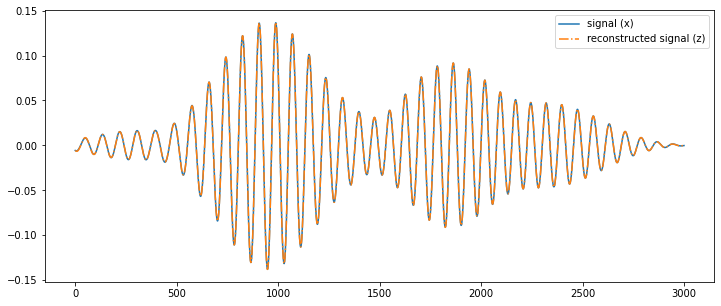

In [29]:
z_c1 = np.zeros(Fs_c)


# the sampled values {x}_n
X_c1 = np.array([y_c1[i] for i in range(len(y_c1)) if i%(Fs_c//fs_c) == 0])

for i in range(len(y_c1)):
    z_c1[i] = (reconstruction_filter_c(i/Fs_c, X_c1, fs_c))

plot_linegraphs_unmarked(x_c1, z_c1, xlabel='signal (x)', ylabel='reconstructed signal (z)',
                        title='Comparing x and z')

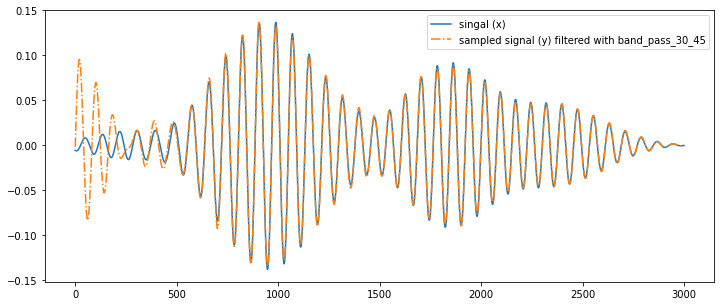

In [30]:
u_c1 = 100*(signal.filtfilt(band_pass_30_45_b, band_pass_30_45_a, y_c1))

plot_linegraphs_unmarked(x_c1, u_c1, xlabel='singal (x)', ylabel='sampled signal (y) filtered with band_pass_30_45',
                        title='Comparing x and u')

## Part (c.ii)

In [31]:
band_pass_26_39_b, band_pass_26_39_a = signal.cheby2(3, 30, [26/1500, 39/1500], 'bandpass', output='ba')
band_pass_25_40_b, band_pass_25_40_a = signal.cheby2(3, 20, [25/1500, 40/1500], 'bandpass', output='ba')

In [36]:
x_c2 = signal.filtfilt(band_pass_26_39_b, band_pass_26_39_a, r_c)
y_c2 = [x_c2[i] if i%100==0 else 0 for i in range(len(x_c2))]

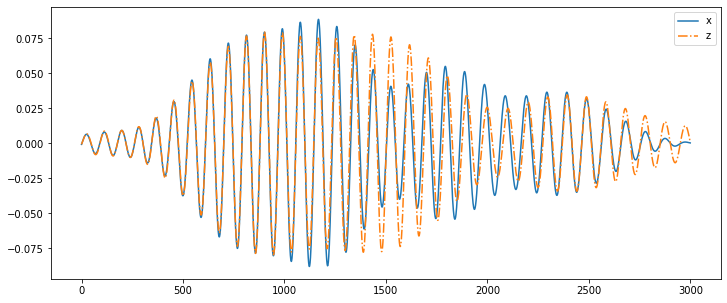

In [37]:
z_c2 = np.zeros(Fs_c)

X_c2 = np.array(y_c2[0::100])

for i in range(Fs_c):
    z_c2[i] = reconstruction_filter_c(i/Fs_c, X_c2, fs_c)
    
plt.figure(num=1, figsize=(12, 5))
plt.plot(x_c2, label='x')
plt.plot(z_c2, label='z', linestyle='-.')
plt.legend()

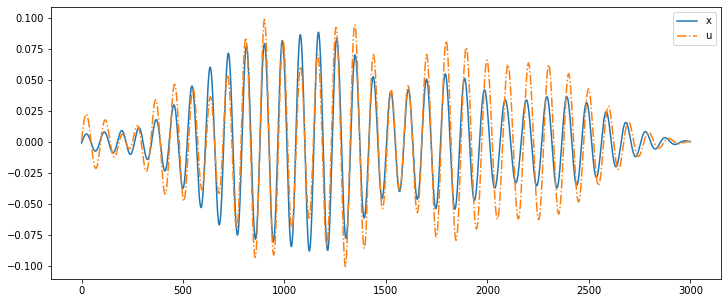

In [39]:
u_c2 = 100*(signal.filtfilt(band_pass_25_40_b, band_pass_25_40_a, y_c2))

plt.figure(num=1, figsize=(12, 5))
plt.plot(x_c2, label='x')
plt.plot(u_c2, label='u', linestyle='-.')
plt.legend()

### Part c.ii
